<a href="https://colab.research.google.com/github/smonto43/UTS_MDSI/blob/main/36106MLAA/Assigment1/MLAA_Notebook_experiments.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Experiment Notebook**



## Context


### 0. Import Packages

In [1]:
! pip install -r https://raw.githubusercontent.com/aso-uts/labs_datasets/main/36106-mlaa/requirements.txt

In [37]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import datetime
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import mean_absolute_error as mae


import warnings

warnings.filterwarnings("ignore", category=FutureWarning)
pd.set_option('display.max_columns', None)

### 1.   Load Dataset

Training data

In [3]:
file_url = 'https://drive.google.com/uc?export=download&id=1-IlfTscbeco2Mxn6e_Hu5yAP9qhckSJH'
df = pd.read_csv(file_url)
df.head(50)

,id,gender,dob,10percentage,12graduation,12percentage,collegeid,collegetier,degree,specialization,collegegpa,collegecityid,collegecitytier,graduationyear,english,logical,quant,domain,computerprogramming,electronicsandsemicon,computerscience,mechanicalengg,electricalengg,telecomengg,civilengg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience,salary
0,604399,f,1990-10-22,87.80,2009,84.00,6920,1,B.Tech/B.E.,instrumentation and control engineering,73.82,6920,1,2013,650,665,810,0.694479,485,366,-1,-1,-1,-1,-1,-0.1590,0.3789,1.2396,0.14590,0.2889,445000
1,988334,m,1990-05-15,57.00,2010,64.50,6624,2,B.Tech/B.E.,computer science & engineering,65.00,6624,0,2014,440,435,210,0.342315,365,-1,-1,-1,-1,-1,-1,1.1336,0.0459,1.2396,0.52620,-0.2859,110000
2,301647,m,1989-08-21,77.33,2007,85.17,9084,2,B.Tech/B.E.,electronics & telecommunications,61.94,9084,0,2011,485,475,505,0.824666,-1,400,-1,-1,-1,260,-1,0.5100,-0.1232,1.5428,-0.29020,-0.2875,255000
3,582313,m,1991-05-04,84.30,2009,86.00,8195,1,B.Tech/B.E.,computer science & engineering,80.40,8195,1,2013,675,620,635,0.990009,655,-1,-1,-1,-1,-1,-1,-0.4463,0.2124,0.3174,0.27270,0.4805,420000
4,339001,f,1990-10-30,82.00,2008,75.00,4889,2,B.Tech/B.E.,biotechnology,64.30,4889,1,2012,575,495,365,0.278457,315,-1,-1,-1,-1,-1,-1,-1.4992,-0.7473,-1.0697,0.06223,0.1864,200000
5,609356,f,1989-12-02,83.16,2007,77.00,10950,1,M.Tech./M.E.,instrumentation and control engineering,99.93,10950,0,2013,535,595,620,0.376060,455,300,-1,-1,-1,313,-1,0.8463,-0.6201,-0.7585,-0.99500,-0.2859,440000
6,1081649,f,1989-04-17,72.50,2007,53.20,14381,2,B.Tech/B.E.,mechanical engineering,68.00,14381,1,2013,510,495,405,0.829585,-1,-1,-1,469,-1,-1,-1,0.1282,-0.4536,0.3174,0.90660,-0.0943,150000
7,610842,f,1991-04-11,77.00,2009,88.00,13208,2,B.Tech/B.E.,computer science & engineering,71.00,13208,1,2013,370,470,280,0.704090,465,-1,-1,-1,-1,-1,-1,0.1282,0.5454,0.4711,0.90660,-0.2859,105000
8,1183070,m,1992-11-25,76.80,2010,87.70,5338,2,B.Tech/B.E.,information technology,73.15,5338,0,2014,510,555,440,0.744758,525,-1,438,-1,-1,-1,-1,-0.1590,-0.4536,0.1637,0.52620,-0.0943,195000
9,794062,f,1993-03-15,57.00,2009,73.00,8346,2,B.Tech/B.E.,computer science & engineering,70.08,8346,0,2014,500,410,560,0.622643,385,-1,407,-1,-1,-1,-1,-0.7335,-0.4536,-0.2974,1.41360,0.6721,200000


Vaidation data

In [44]:
file_url_val = 'https://drive.google.com/uc?export=download&id=1_y3VAvfu58ebeAByXY5JaV1_k3pXAZtJ'
df_val = pd.read_csv(file_url_val)
df_val.head(2)

,id,gender,dob,10percentage,12graduation,12percentage,collegeid,collegetier,degree,specialization,collegegpa,collegecityid,collegecitytier,graduationyear,english,logical,quant,domain,computerprogramming,electronicsandsemicon,computerscience,mechanicalengg,electricalengg,telecomengg,civilengg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience,salary
0,604399,f,1990-10-22,87.8,2009,84.0,6920,1,B.Tech/B.E.,instrumentation and control engineering,73.82,6920,1,2013,650,665,810,0.694479,485,366,-1,-1,-1,-1,-1,-0.1590,0.3789,1.2396,0.1459,0.2889,445000
1,988334,m,1990-05-15,57.0,2010,64.5,6624,2,B.Tech/B.E.,computer science & engineering,65.00,6624,0,2014,440,435,210,0.342315,365,-1,-1,-1,-1,-1,-1,1.1336,0.0459,1.2396,0.5262,-0.2859,110000


testing data

In [5]:
file_url_test = 'https://drive.google.com/uc?export=download&id=1-GviBcJoaYHdwCjXvsg2zMdOAGiPsNb7'
df_test = pd.read_csv(file_url_test)
df_test.head(2)

,id,gender,dob,10percentage,12graduation,12percentage,collegeid,collegetier,degree,specialization,collegegpa,collegecityid,collegecitytier,graduationyear,english,logical,quant,domain,computerprogramming,electronicsandsemicon,computerscience,mechanicalengg,electricalengg,telecomengg,civilengg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience,salary
0,604399,f,1990-10-22,87.8,2009,84.0,6920,1,B.Tech/B.E.,instrumentation and control engineering,73.82,6920,1,2013,650,665,810,0.694479,485,366,-1,-1,-1,-1,-1,-0.1590,0.3789,1.2396,0.1459,0.2889,445000
1,988334,m,1990-05-15,57.0,2010,64.5,6624,2,B.Tech/B.E.,computer science & engineering,65.00,6624,0,2014,440,435,210,0.342315,365,-1,-1,-1,-1,-1,-1,1.1336,0.0459,1.2396,0.5262,-0.2859,110000


### 2. Explore Dataset

In [6]:
df.isnull().sum()

id                       0
gender                   0
dob                      0
10percentage             0
12graduation             0
12percentage             0
collegeid                0
collegetier              0
degree                   0
specialization           0
collegegpa               0
collegecityid            0
collegecitytier          0
graduationyear           0
english                  0
logical                  0
quant                    0
domain                   0
computerprogramming      0
electronicsandsemicon    0
computerscience          0
mechanicalengg           0
electricalengg           0
telecomengg              0
civilengg                0
conscientiousness        0
agreeableness            0
extraversion             0
nueroticism              0
openess_to_experience    0
salary                   0
dtype: int64

calculate the age of each person

In [7]:
df['dob'] = pd.to_datetime(df['dob'])

# Calcular la edad y asignarla a una nueva columna llamada 'age'
df['age'] = df['dob'].apply(lambda x: datetime.datetime.now().year - x.year - ((datetime.datetime.now().month, datetime.datetime.now().day) < (x.month, x.day)))


In [8]:
df[['id','collegeid', 'collegetier', 'collegecityid', 'collegecitytier']] = df[['id','collegeid', 'collegetier', 'collegecityid', 'collegecitytier']].astype(str)


In [9]:

df.dtypes


id                               object
gender                           object
dob                      datetime64[ns]
10percentage                    float64
12graduation                      int64
12percentage                    float64
collegeid                        object
collegetier                      object
degree                           object
specialization                   object
collegegpa                      float64
collegecityid                    object
collegecitytier                  object
graduationyear                    int64
english                           int64
logical                           int64
quant                             int64
domain                          float64
computerprogramming               int64
electronicsandsemicon             int64
computerscience                   int64
mechanicalengg                    int64
electricalengg                    int64
telecomengg                       int64
civilengg                         int64


In [10]:
df.describe(include='all')

,id,gender,dob,10percentage,12graduation,12percentage,collegeid,collegetier,degree,specialization,collegegpa,collegecityid,collegecitytier,graduationyear,english,logical,quant,domain,computerprogramming,electronicsandsemicon,computerscience,mechanicalengg,electricalengg,telecomengg,civilengg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience,salary,age
count,2998,2998,2998,2998.000000,2998.000000,2998.000000,2998,2998,2998,2998,2998.000000,2998,2998,2998.000000,2998.000000,2998.000000,2998.000000,2998.000000,2998.000000,2998.000000,2998.000000,2998.000000,2998.000000,2998.000000,2998.000000,2998.000000,2998.000000,2998.000000,2998.000000,2998.000000,2.998000e+03,2998.000000
unique,2998,2,NaN,NaN,NaN,NaN,1173,2,4,42,NaN,1173,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,604399,m,NaN,NaN,NaN,NaN,272,2,B.Tech/B.E.,electronics and communication engineering,NaN,272,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,2282,NaN,NaN,NaN,NaN,67,2772,2757,670,NaN,67,2110,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,1990-12-06 14:02:00.080053376,77.666264,2008.080720,74.341061,NaN,NaN,NaN,NaN,71.509857,NaN,NaN,2011.939960,501.066378,500.431621,514.137759,0.508458,351.868579,96.228152,94.147098,24.138759,16.267845,31.068379,1.946965,-0.038714,0.126217,-0.008662,-0.145965,-0.141111,3.051748e+05,32.757171
min,NaN,NaN,1981-05-06 00:00:00,43.000000,1998.000000,40.000000,NaN,NaN,NaN,NaN,6.630000,NaN,NaN,0.000000,180.000000,195.000000,120.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-3.893300,-5.781600,-4.600900,-2.643000,-7.375700,3.500000e+04,26.000000
25%,NaN,NaN,1989-11-11 06:00:00,71.140000,2007.000000,66.000000,NaN,NaN,NaN,NaN,66.530000,NaN,NaN,2012.000000,425.000000,441.250000,430.000000,0.342315,295.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-0.649100,-0.435300,-0.604800,-0.868200,-0.669200,1.800000e+05,32.000000
50%,NaN,NaN,1991-03-05 00:00:00,78.965000,2008.000000,74.000000,NaN,NaN,NaN,NaN,71.800000,NaN,NaN,2013.000000,500.000000,505.000000,515.000000,0.622643,415.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0.046400,0.212400,0.091400,-0.172700,-0.094300,3.000000e+05,33.000000
75%,NaN,NaN,1992-03-09 18:00:00,85.600000,2009.000000,82.600000,NaN,NaN,NaN,NaN,76.300000,NaN,NaN,2014.000000,570.000000,565.000000,595.000000,0.835612,495.000000,233.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0.702700,0.812800,0.672000,0.526200,0.502400,3.700000e+05,34.000000
max,NaN,NaN,1997-05-27 00:00:00,97.760000,2012.000000,98.700000,NaN,NaN,NaN,NaN,99.930000,NaN,NaN,2017.000000,875.000000,795.000000,900.000000,0.999910,804.000000,612.000000,715.000000,623.000000,660.000000,548.000000,500.000000,1.995300,1.904800,2.161700,3.352500,1.630200,4.000000e+06,42.000000


numerical data distribution

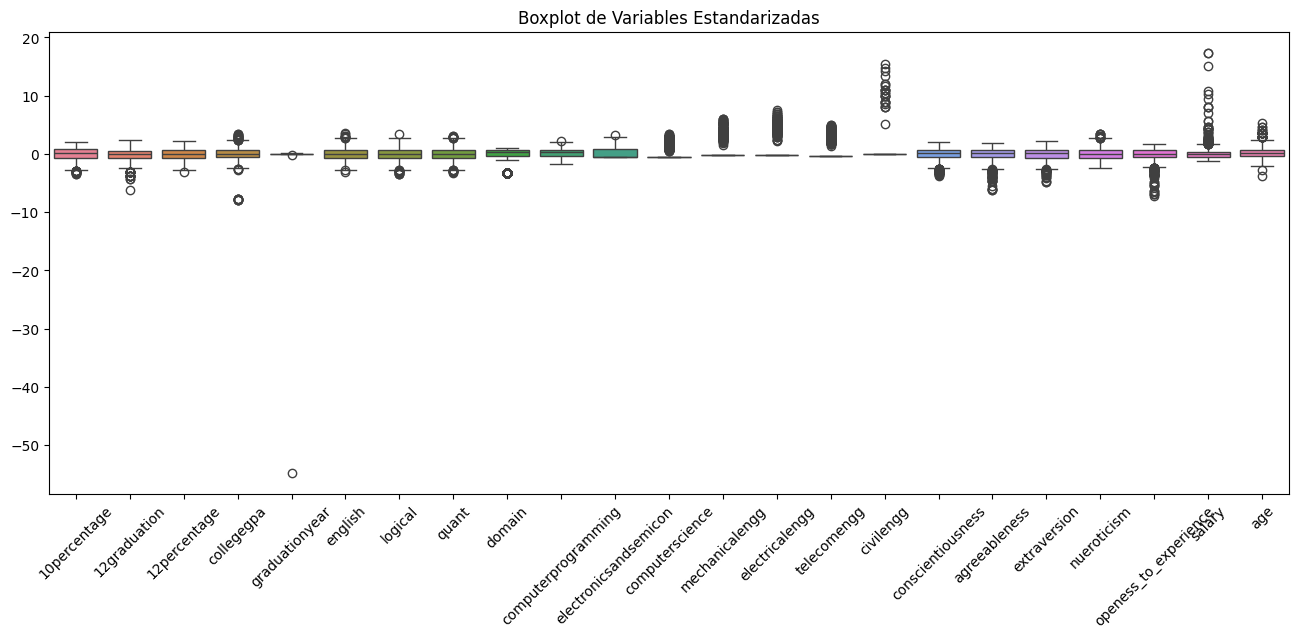

In [11]:
from sklearn.preprocessing import StandardScaler

df_numeric = df.select_dtypes(include=['float64', 'int64'])

# Estandarizar los datos
scaler = StandardScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df_numeric), columns=df_numeric.columns)

# Gráfico de caja para todas las columnas estandarizadas
plt.figure(figsize=(16, 6))
sns.boxplot(data=df_scaled)
plt.xticks(rotation=45)
plt.title('Boxplot de Variables Estandarizadas')
plt.show()


<Figure size 1000x600 with 0 Axes>

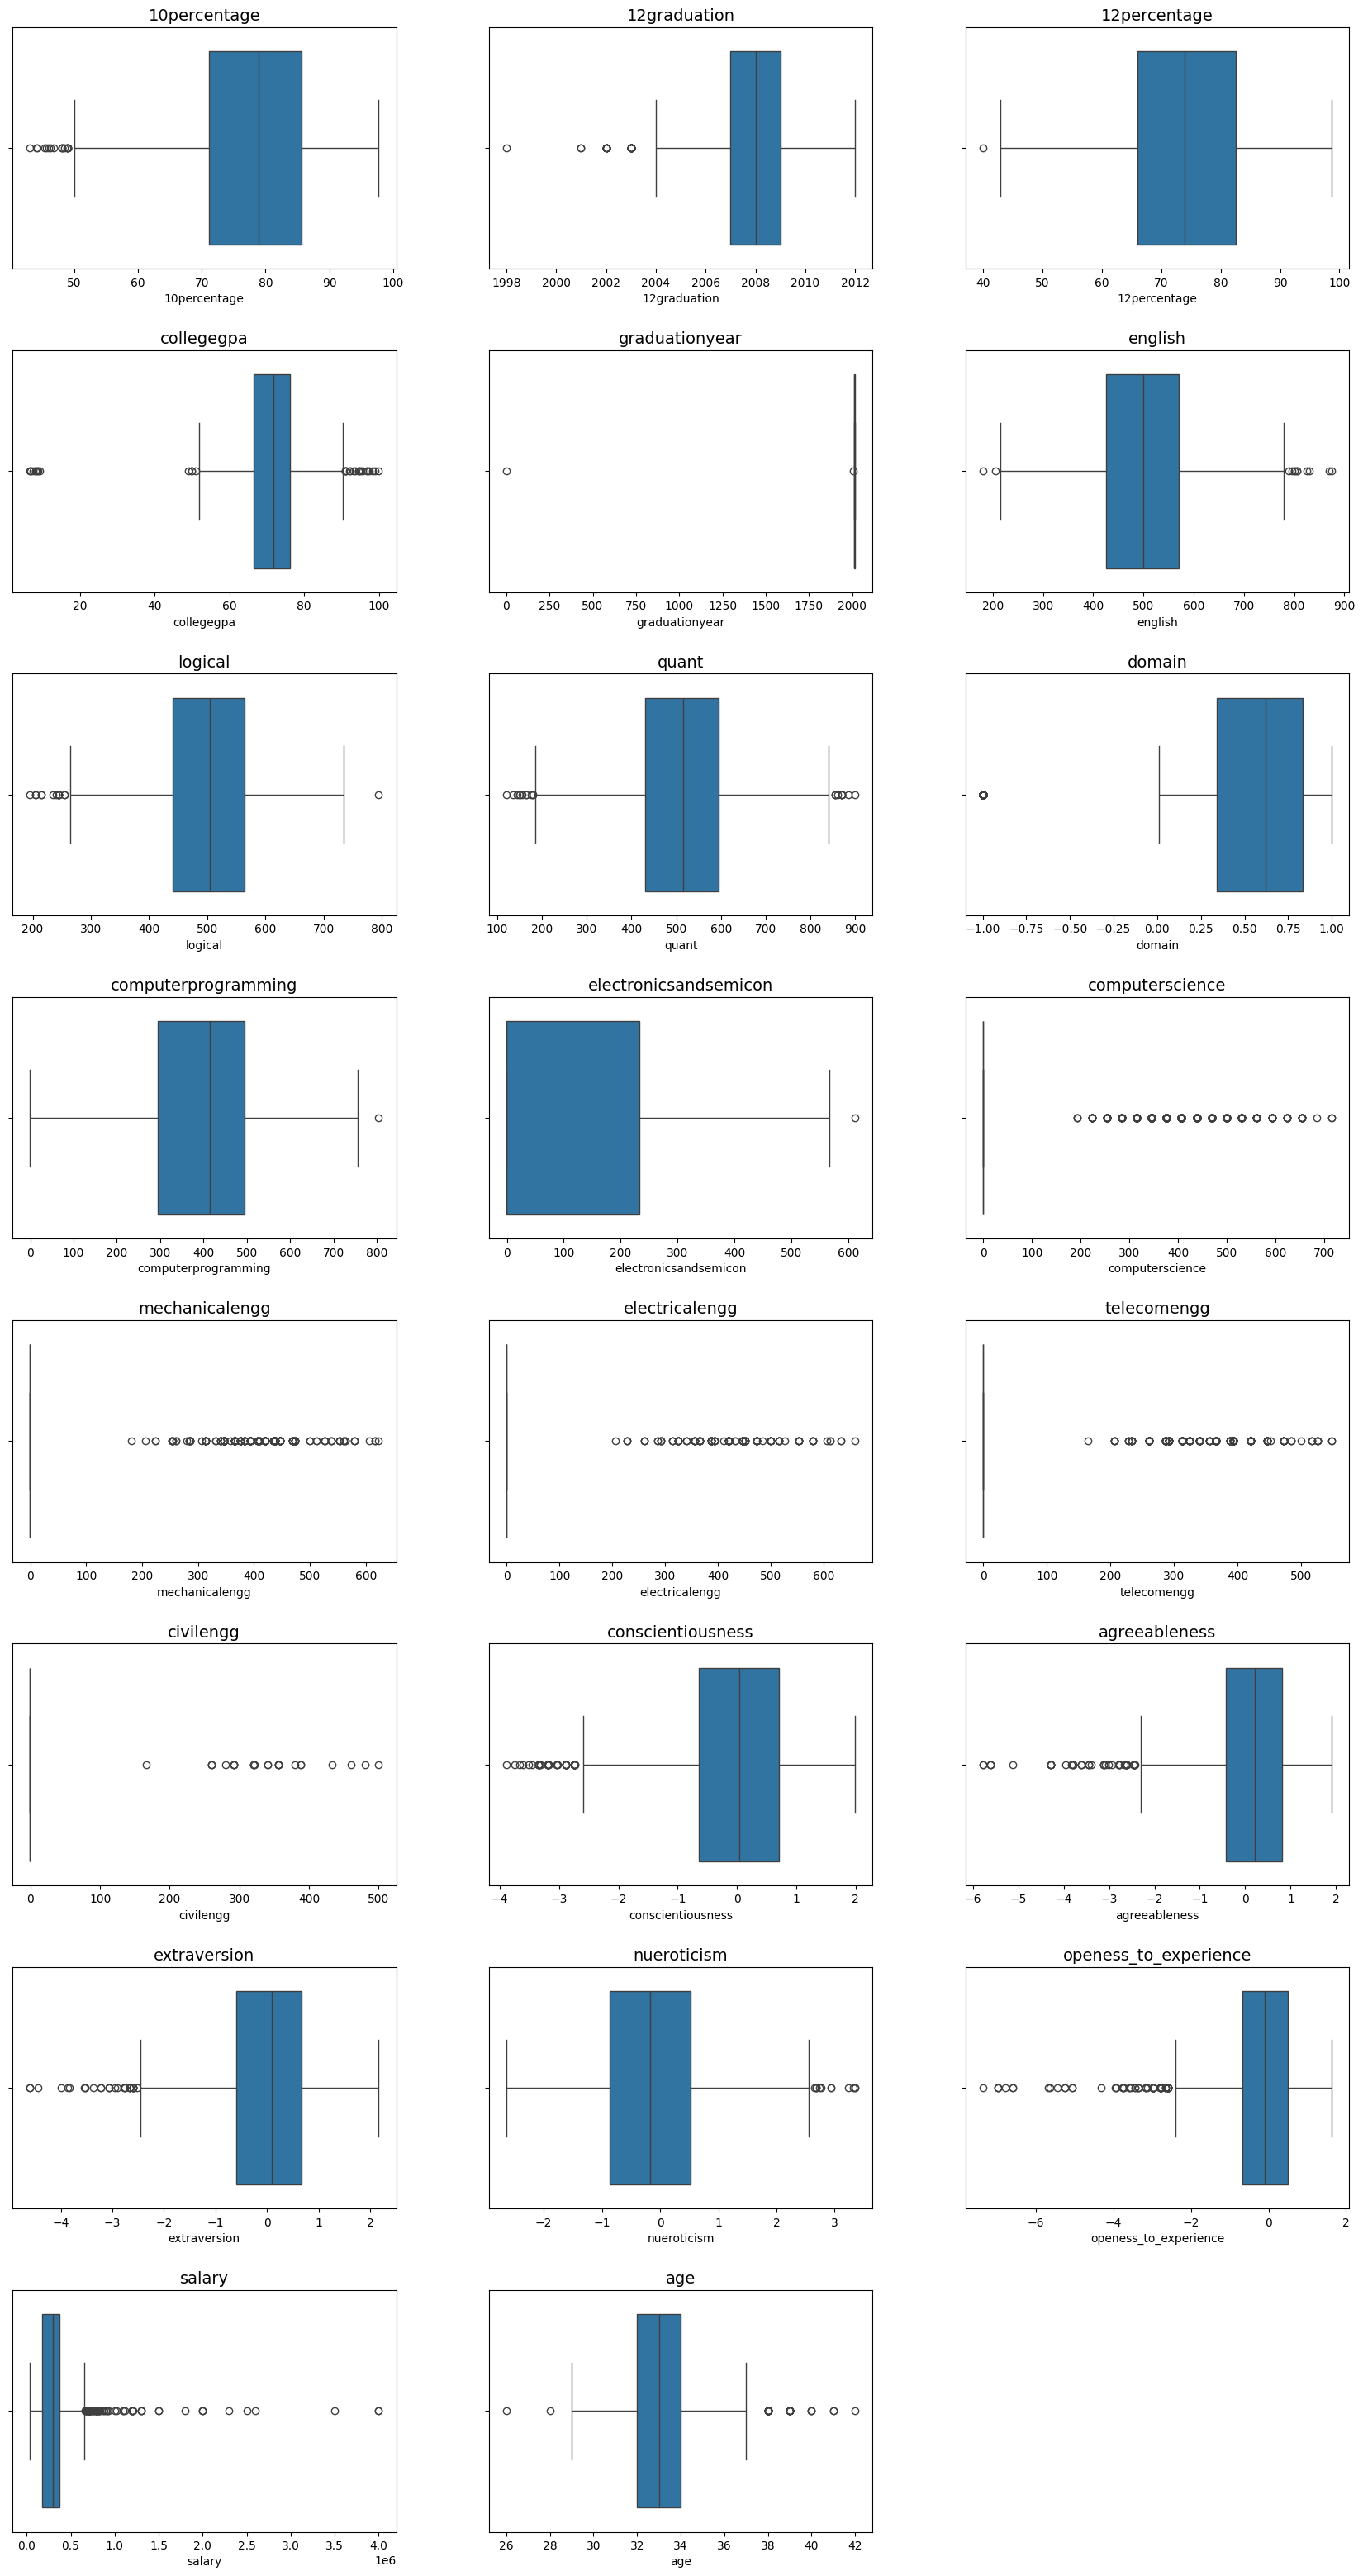

In [12]:
df_numeric = df.select_dtypes(include=['float64', 'int64'])

# Configuración de visualización para mejorar la legibilidad
plt.figure(figsize=(10, 6))

# Número de filas/columnas para el subplot
n_rows = len(df_numeric.columns) // 3 + (len(df_numeric.columns) % 3 > 0)
n_cols = 3

fig, axs = plt.subplots(n_rows, n_cols, figsize=(n_cols*6, n_rows*4))
fig.tight_layout(pad=5.0)

for i, col in enumerate(df_numeric.columns):
    row = i // n_cols
    col_idx = i % n_cols
    sns.boxplot(x=df_numeric[col], ax=axs[row, col_idx])
    axs[row, col_idx].set_title(col, fontsize=14)

# Ocultar gráficos vacíos si los hay
for j in range(i+1, n_rows*n_cols):
    axs[j // n_cols, j % n_cols].set_visible(False)

plt.show()

notes after the boxplots and the statistic descrive:
* `graduation year` have a 0 value needs to be removed
*  `collegegpa` seems to have some really low values, below 20. Further inspection needed
* `domain` had on -1 value, need to be removed
* `computerprogramming`,	`electronicsandsemicon`,	`computerscience`,	`mechanicalengg`,	`electricalengg`,	`telecomengg` and `civilengg` columns need further exploration about the -1 one values and without those values.

Column inspection by the distribution

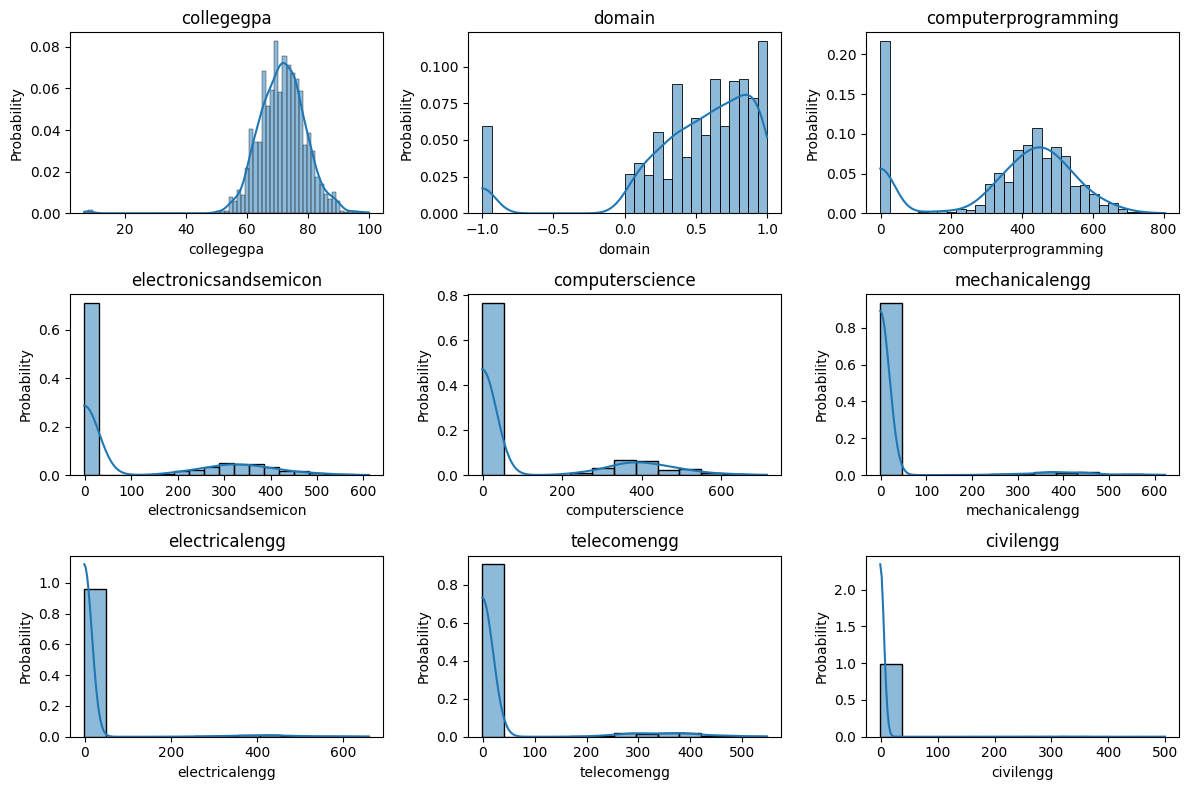

In [13]:
cols_to_plot = [
    'collegegpa','domain','computerprogramming', 'electronicsandsemicon', 'computerscience',
    'mechanicalengg', 'electricalengg', 'telecomengg', 'civilengg'
]


# Configuración del tamaño del gráfico
plt.figure(figsize=(12, 8))

for i, col in enumerate(cols_to_plot, 1):
    plt.subplot(3, 3, i)  # Ajusta los números aquí según el número de gráficos. Aquí se asume una disposición de 3x3.
    # Filtrar los valores -1 antes de graficar
    sns.histplot(df[col], kde=True, stat='probability')  # kde=True agrega una estimación de densidad kernel
    plt.title(col)

plt.tight_layout()
plt.show()

In [14]:
cols_to_plot = [
    'computerprogramming', 'electronicsandsemicon', 'computerscience',
    'mechanicalengg', 'electricalengg', 'telecomengg', 'civilengg'
]
for i in cols_to_plot:
  value = len(df[i][df[i] == -1]) / len(df[i])
  print(f'For the col {i}, {round(value*100,2)}% of the data are -1')


For the col computerprogramming, 21.68% of the data are -1
For the col electronicsandsemicon, 71.15% of the data are -1
For the col computerscience, 76.65% of the data are -1
For the col mechanicalengg, 93.76% of the data are -1
For the col electricalengg, 95.93% of the data are -1
For the col telecomengg, 90.86% of the data are -1
For the col civilengg, 99.13% of the data are -1


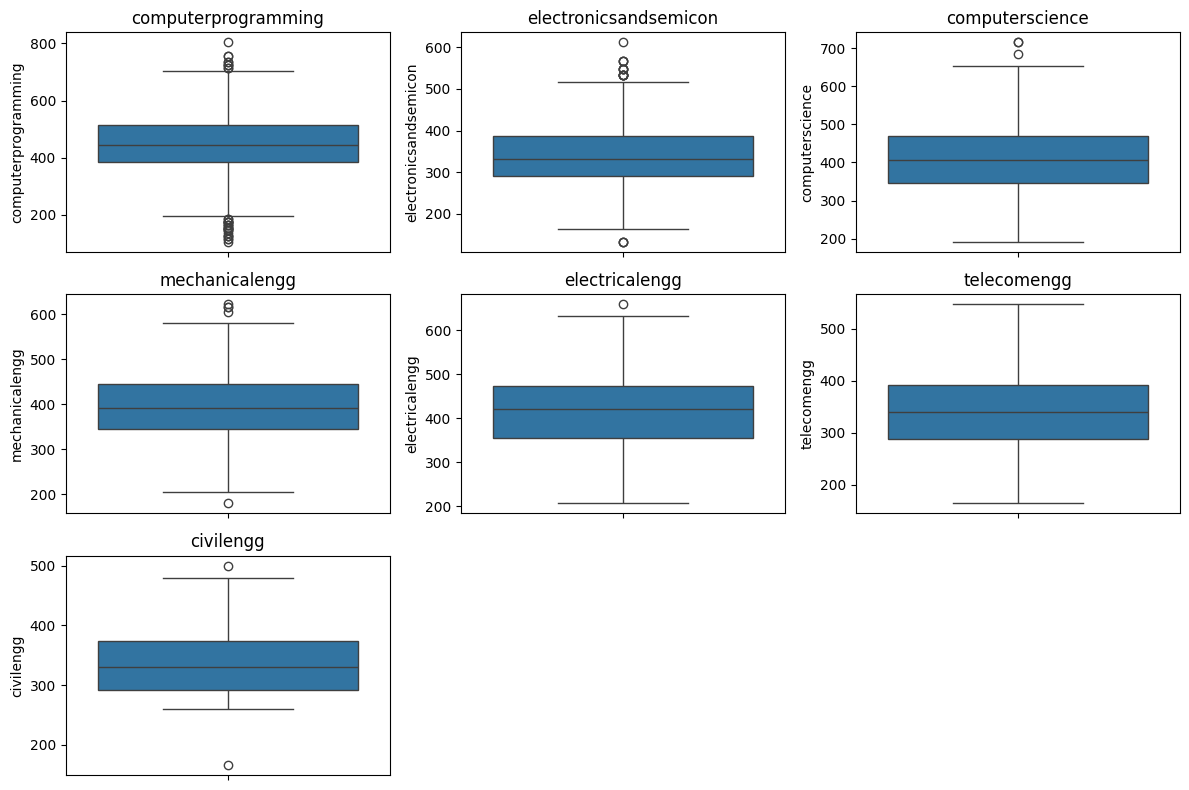

In [15]:

# Configuración del tamaño del gráfico
plt.figure(figsize=(12, 8))

# Iterar a través de la lista de columnas para generar los boxplots
for i, col in enumerate(cols_to_plot, 1):
    plt.subplot(3, 3, i)  # Ajusta los números aquí según el número de gráficos. Aquí se asume una disposición de 3x3.
    # Filtrar los valores -1 antes de graficar
    sns.boxplot(y=df[df[col] != -1][col])
    plt.title(col)

plt.tight_layout()
plt.show()

notes:

* `civilengg` has to many -1, consider to drop it, same for the `electricalengg` and the `mechanicalengg` column

numercial columns cleaning

In [16]:
df = df[(df['graduationyear'] != 0) & (df['collegegpa'] >= 20) & (df['domain'] != -1)]


### Further inspection needed

In [17]:
df.drop(columns=['civilengg', 'electricalengg', 'mechanicalengg'], inplace = True)

<ipython-input-17-17bd31581a9e>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(columns=['civilengg', 'electricalengg', 'mechanicalengg'], inplace = True)


correlation map between numerical variables

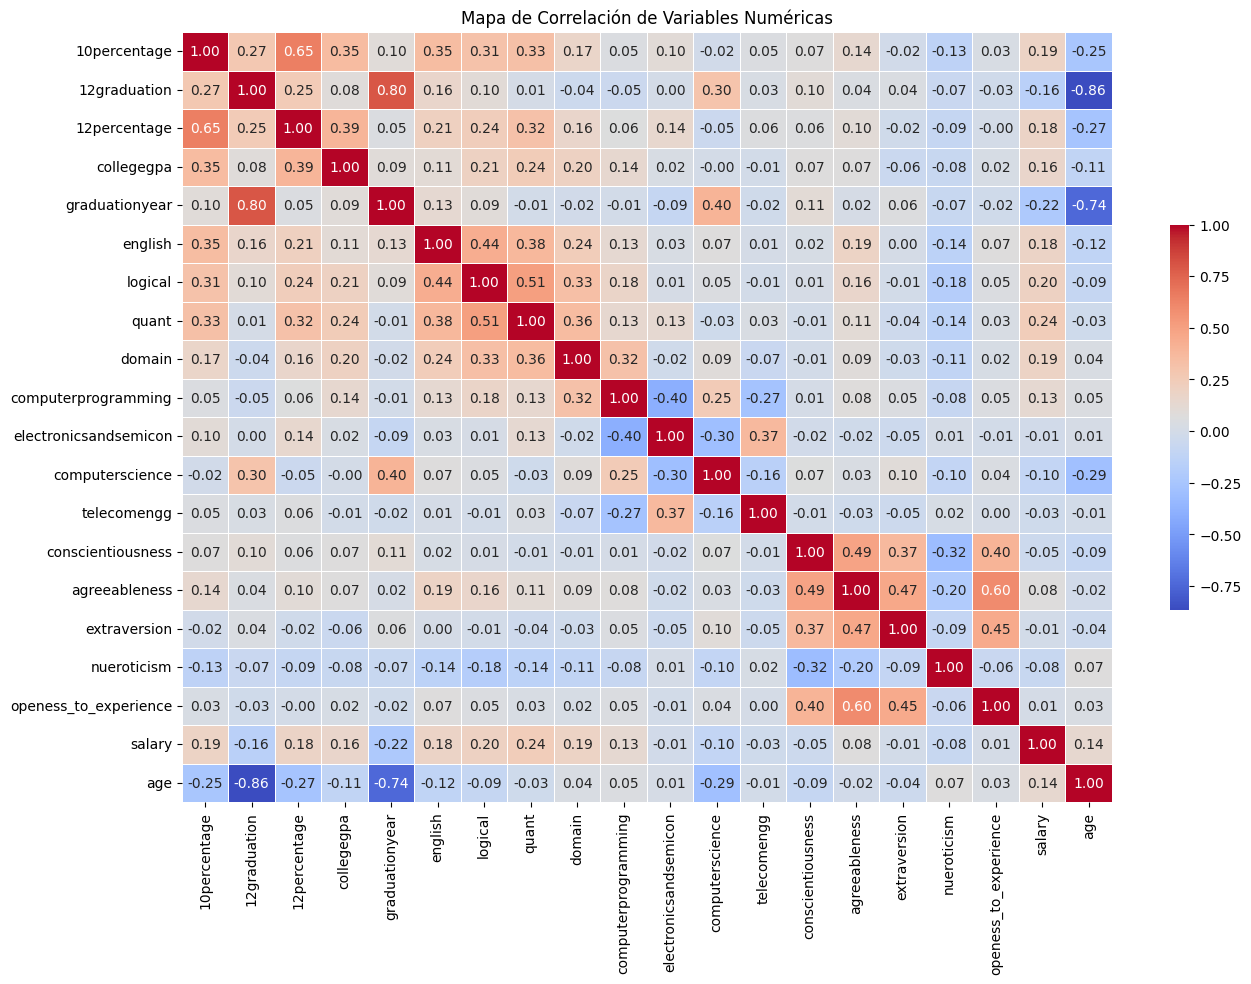

In [18]:
df_numeric = df.select_dtypes(include=['float64', 'int64'])

corr_matrix = df_numeric.corr()

plt.figure(figsize=(15, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5, cbar_kws={"shrink": .5})
plt.title('Mapa de Correlación de Variables Numéricas')
plt.show()

heat map without -1 values

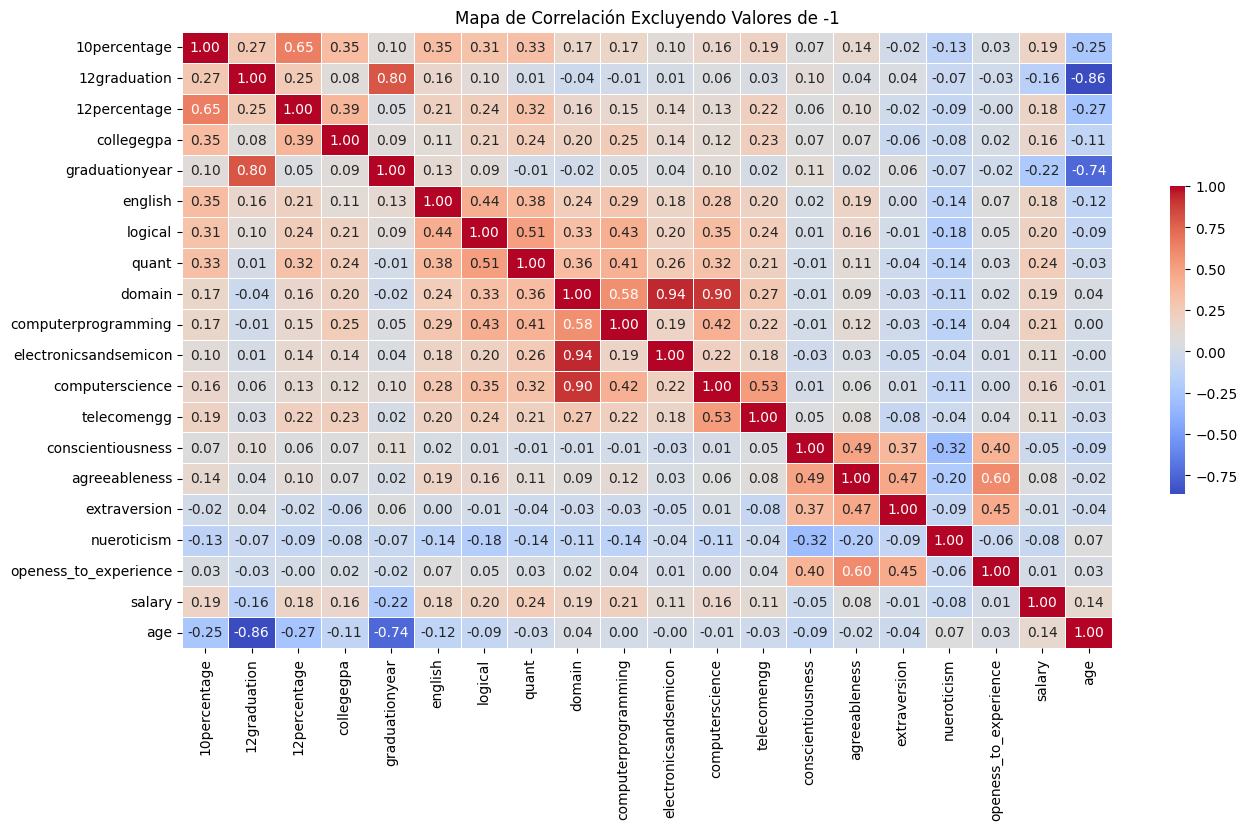

In [19]:
df_numeric_no_neg_ones = df.select_dtypes(include=['float64', 'int64']).replace(-1, np.nan)

# Calcular la matriz de correlación sobre el DataFrame actualizado
corr_matrix = df_numeric_no_neg_ones.corr()

# Crear el heatmap de correlación
plt.figure(figsize=(15, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5, cbar_kws={"shrink": .5})
plt.title('Mapa de Correlación Excluyendo Valores de -1')
plt.show()

droped columns due correlation:

1) `12graduation`, `graduationyear` are correlated with `age`

2) `10percentage` is correlated with `12peercentage`

3)

categorical variables distribution

In [20]:
df[df['specialization'].str.contains('&|and', na=False)]['specialization'].unique()

array(['instrumentation and control engineering',
       'computer science & engineering',
       'electronics & telecommunications',
       'electronics and communication engineering',
       'computer science and technology',
       'electronics and electrical engineering',
       'electronics & instrumentation eng',
       'electronics and instrumentation engineering',
       'applied electronics and instrumentation',
       'electronics and computer engineering',
       'mechanical and automation', 'industrial & management engineering',
       'industrial & production engineering',
       'information & communication technology'], dtype=object)

In [21]:
df[['specialization1', 'specialization2']] = df['specialization'].str.split(' *& *| *and *', n=1, expand=True)

# Hacer trim a los valores en las nuevas columnas para quitar espacios iniciales y finales
df['specialization1'] = df['specialization1'].str.strip()
df['specialization2'] = df['specialization2'].str.strip()
df.drop(columns=['specialization', 'dob'], inplace = True)

In [22]:
df.head(2)

,id,gender,10percentage,12graduation,12percentage,collegeid,collegetier,degree,collegegpa,collegecityid,collegecitytier,graduationyear,english,logical,quant,domain,computerprogramming,electronicsandsemicon,computerscience,telecomengg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience,salary,age,specialization1,specialization2
0,604399,f,87.8,2009,84.0,6920,1,B.Tech/B.E.,73.82,6920,1,2013,650,665,810,0.694479,485,366,-1,-1,-0.1590,0.3789,1.2396,0.1459,0.2889,445000,33,instrumentation,control engineering
1,988334,m,57.0,2010,64.5,6624,2,B.Tech/B.E.,65.00,6624,0,2014,440,435,210,0.342315,365,-1,-1,-1,1.1336,0.0459,1.2396,0.5262,-0.2859,110000,33,computer science,engineering


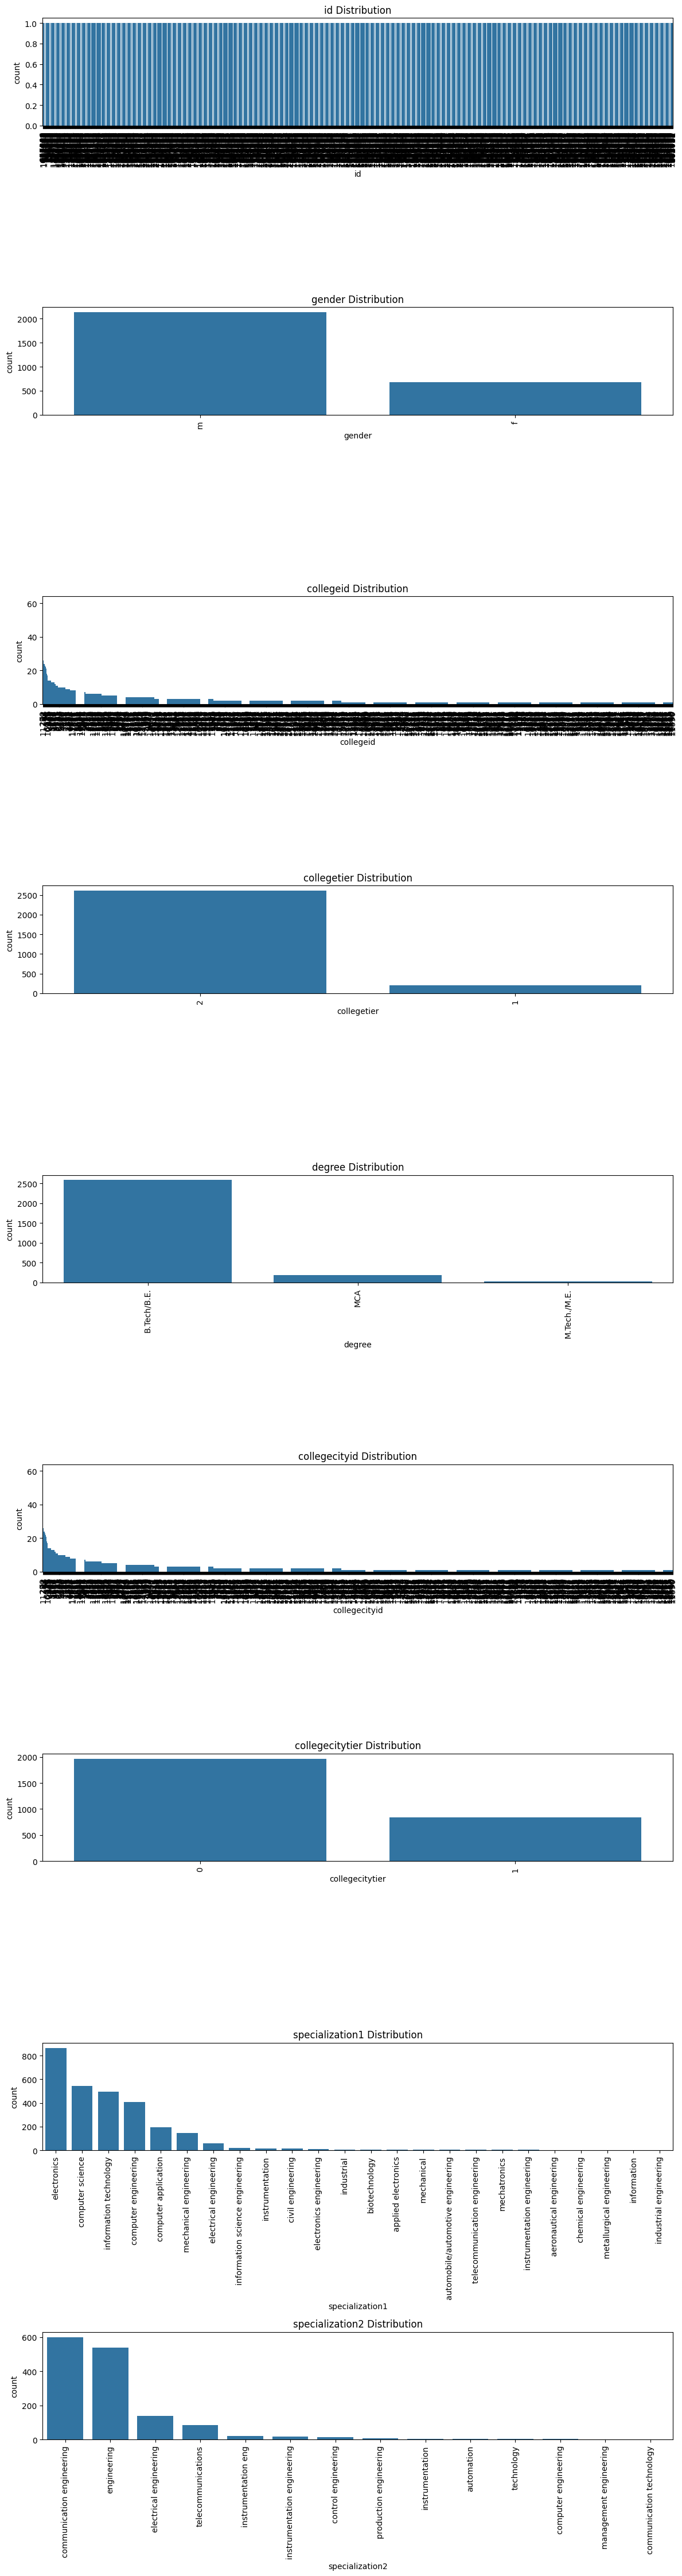

In [23]:
df_categorical = df.select_dtypes(include=['object', 'category'])

plt.figure(figsize=(12, 5 * len(df_categorical.columns)))

for i, col in enumerate(df_categorical.columns, 1):
    plt.subplot(len(df_categorical.columns), 1, i)
    sns.countplot(data=df, x=col, order=df[col].value_counts().index)
    plt.title(f'{col} Distribution')
    plt.xticks(rotation=90)

plt.tight_layout()
plt.show()



### 3. Explore Target variable

In [24]:
target = 'salary'

### 4. Explore Variables of Interest

### 5. Prepare Data

In [25]:
df_cleaned = df.copy()

In [33]:
df_cleaned = df_cleaned[(df_cleaned['graduationyear'] != 0) & (df_cleaned['collegegpa'] >= 20) & (df_cleaned['domain'] != -1)]

In [27]:
def clean_df(df_treated):

  df_procesing = df_treated.copy()

  df_procesing['dob'] = pd.to_datetime(df_procesing['dob'])

  # Calcular la edad y asignarla a una nueva columna llamada 'age'
  df_procesing['age'] = df_procesing['dob'].apply(lambda x: datetime.datetime.now().year - x.year - ((datetime.datetime.now().month, datetime.datetime.now().day) < (x.month, x.day)))

  df_procesing = df_procesing[(df_procesing['graduationyear'] != 0) & (df_procesing['collegegpa'] >= 20) & (df_procesing['domain'] != -1)]
  df_procesing[['specialization1', 'specialization2']] = df_procesing['specialization'].str.split(' *& *| *and *', n=1, expand=True)

  # Hacer trim a los valores en las nuevas columnas para quitar espacios iniciales y finales
  df_procesing['specialization1'] = df_procesing['specialization1'].str.strip()
  df_procesing['specialization2'] = df_procesing['specialization2'].str.strip()
  df_procesing.drop(columns=['specialization', 'dob'], inplace = True)

  return df_procesing


### 6. Split Dataset

In [28]:
df_val = clean_df(df_val)
df_test = clean_df(df_test)

In [29]:
df.columns

Index(['id', 'gender', '10percentage', '12graduation', '12percentage',
       'collegeid', 'collegetier', 'degree', 'collegegpa', 'collegecityid',
       'collegecitytier', 'graduationyear', 'english', 'logical', 'quant',
       'domain', 'computerprogramming', 'electronicsandsemicon',
       'computerscience', 'telecomengg', 'conscientiousness', 'agreeableness',
       'extraversion', 'nueroticism', 'openess_to_experience', 'salary', 'age',
       'specialization1', 'specialization2'],
      dtype='object')

In [30]:
x_columns = ['id', 'gender', '10percentage', '12graduation', '12percentage',
       'collegeid', 'collegetier', 'degree', 'collegegpa', 'collegecityid',
       'collegecitytier', 'graduationyear', 'english', 'logical', 'quant',
       'domain', 'computerprogramming', 'electronicsandsemicon',
       'computerscience', 'telecomengg', 'conscientiousness', 'agreeableness',
       'extraversion', 'nueroticism', 'openess_to_experience',  'age',
       'specialization1', 'specialization2']

In [34]:
X_train = df[x_columns]
X_val = df_val[x_columns]
X_test = df_test[x_columns]

y_train = df[target]
y_val = df_val[target]
y_test = df_test[target]

In [43]:
df_test

,id,gender,10percentage,12graduation,12percentage,collegeid,collegetier,degree,collegegpa,collegecityid,collegecitytier,graduationyear,english,logical,quant,domain,computerprogramming,electronicsandsemicon,computerscience,mechanicalengg,electricalengg,telecomengg,civilengg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience,salary,age,specialization1,specialization2
0,604399,f,87.80,2009,84.00,6920,1,B.Tech/B.E.,73.82,6920,1,2013,650,665,810,0.694479,485,366,-1,-1,-1,-1,-1,-0.1590,0.3789,1.2396,0.14590,0.2889,445000,33,instrumentation,control engineering
1,988334,m,57.00,2010,64.50,6624,2,B.Tech/B.E.,65.00,6624,0,2014,440,435,210,0.342315,365,-1,-1,-1,-1,-1,-1,1.1336,0.0459,1.2396,0.52620,-0.2859,110000,33,computer science,engineering
2,301647,m,77.33,2007,85.17,9084,2,B.Tech/B.E.,61.94,9084,0,2011,485,475,505,0.824666,-1,400,-1,-1,-1,260,-1,0.5100,-0.1232,1.5428,-0.29020,-0.2875,255000,34,electronics,telecommunications
3,582313,m,84.30,2009,86.00,8195,1,B.Tech/B.E.,80.40,8195,1,2013,675,620,635,0.990009,655,-1,-1,-1,-1,-1,-1,-0.4463,0.2124,0.3174,0.27270,0.4805,420000,32,computer science,engineering
4,339001,f,82.00,2008,75.00,4889,2,B.Tech/B.E.,64.30,4889,1,2012,575,495,365,0.278457,315,-1,-1,-1,-1,-1,-1,-1.4992,-0.7473,-1.0697,0.06223,0.1864,200000,33,biotechnology,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2993,103174,f,75.00,2005,73.00,1263,2,B.Tech/B.E.,70.00,1263,1,2010,505,485,445,0.538387,245,333,-1,-1,-1,-1,-1,-1.1901,0.9688,-1.0697,1.35490,0.0284,120000,34,electronics,communication engineering
2994,352811,f,84.00,2008,77.00,9481,2,B.Tech/B.E.,75.20,9481,0,2012,345,585,395,0.190153,315,-1,-1,-1,-1,-1,-1,-0.1082,0.0328,-0.4891,-0.29020,0.5024,120000,32,information technology,None
2995,287070,m,91.40,2006,65.56,547,2,B.Tech/B.E.,73.19,547,0,2011,385,425,485,0.600057,435,-1,-1,-1,-1,-1,-1,-0.8810,0.1888,-0.3440,0.06230,0.6603,385000,35,information technology,None
2996,317336,m,88.64,2006,65.16,1629,2,B.Tech/B.E.,74.81,1629,1,2011,465,645,505,0.901490,545,-1,-1,-1,-1,-1,-1,1.4374,1.2808,-0.4891,-1.46537,0.5419,530000,35,computer engineering,None


In [42]:
df_val

,id,gender,10percentage,12graduation,12percentage,collegeid,collegetier,degree,collegegpa,collegecityid,collegecitytier,graduationyear,english,logical,quant,domain,computerprogramming,electronicsandsemicon,computerscience,mechanicalengg,electricalengg,telecomengg,civilengg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience,salary,age,specialization1,specialization2
0,604399,f,87.80,2009,84.00,6920,1,B.Tech/B.E.,73.82,6920,1,2013,650,665,810,0.694479,485,366,-1,-1,-1,-1,-1,-0.1590,0.3789,1.2396,0.14590,0.2889,445000,33,instrumentation,control engineering
1,988334,m,57.00,2010,64.50,6624,2,B.Tech/B.E.,65.00,6624,0,2014,440,435,210,0.342315,365,-1,-1,-1,-1,-1,-1,1.1336,0.0459,1.2396,0.52620,-0.2859,110000,33,computer science,engineering
2,301647,m,77.33,2007,85.17,9084,2,B.Tech/B.E.,61.94,9084,0,2011,485,475,505,0.824666,-1,400,-1,-1,-1,260,-1,0.5100,-0.1232,1.5428,-0.29020,-0.2875,255000,34,electronics,telecommunications
3,582313,m,84.30,2009,86.00,8195,1,B.Tech/B.E.,80.40,8195,1,2013,675,620,635,0.990009,655,-1,-1,-1,-1,-1,-1,-0.4463,0.2124,0.3174,0.27270,0.4805,420000,32,computer science,engineering
4,339001,f,82.00,2008,75.00,4889,2,B.Tech/B.E.,64.30,4889,1,2012,575,495,365,0.278457,315,-1,-1,-1,-1,-1,-1,-1.4992,-0.7473,-1.0697,0.06223,0.1864,200000,33,biotechnology,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2993,103174,f,75.00,2005,73.00,1263,2,B.Tech/B.E.,70.00,1263,1,2010,505,485,445,0.538387,245,333,-1,-1,-1,-1,-1,-1.1901,0.9688,-1.0697,1.35490,0.0284,120000,34,electronics,communication engineering
2994,352811,f,84.00,2008,77.00,9481,2,B.Tech/B.E.,75.20,9481,0,2012,345,585,395,0.190153,315,-1,-1,-1,-1,-1,-1,-0.1082,0.0328,-0.4891,-0.29020,0.5024,120000,32,information technology,None
2995,287070,m,91.40,2006,65.56,547,2,B.Tech/B.E.,73.19,547,0,2011,385,425,485,0.600057,435,-1,-1,-1,-1,-1,-1,-0.8810,0.1888,-0.3440,0.06230,0.6603,385000,35,information technology,None
2996,317336,m,88.64,2006,65.16,1629,2,B.Tech/B.E.,74.81,1629,1,2011,465,645,505,0.901490,545,-1,-1,-1,-1,-1,-1,1.4374,1.2808,-0.4891,-1.46537,0.5419,530000,35,computer engineering,None


### 7. Baseline Model

In [36]:
y_mean = y_train.mean()
y_central = np.full(y_train.shape, y_mean)

In [38]:
train_perf = mse(y_train, y_central, squared=False)
valid_perf = mse(y_val, y_central, squared=False)
test_perf = mse(y_test, y_central, squared=False)

print('train_perf: ', train_perf)
print('valid_perf: ', valid_perf)
print('test_perf: ', test_perf)


train_perf:  212484.24291174178
valid_perf:  212484.24291174178
test_perf:  212484.24291174178


### 8. Train Machine Learning Model

In [ ]:
model =

### 9. Assess Model Performance

In [ ]:
model_train_perf =
model_valid_perf =
model_test_perf =

### 10. Dudas

1) en columnas de examen que tienen valores de -1, como la de los examenes, como se pueden tratar esos valores a la hora del modelo?

2) Como se puede definir quitar columnas con muchos valores faltantes?, ejemplo: `civilengg` con mas de 99% de valores en -1

3) En una columna como puedo saber si puedo eliminar una categoria por tener muy pocos valores, esto como afecta el modelo? ejemplo:`degree` tiene casi todos los valores en B.Tech y casi ningun valor de M. sc (Tech), es posible eliminar la categoria de M.sc(tech) o es mejor dejarla?

4) Como lidiar con los -1 en un calculo de correlacion, ejemplo, los dos mapas decorrelacion